# Advanced Pandas - Moving Between Long and Wide Data Formats
**Abid Ali**

Skype: Abd.Soft

Email: [abdsoftfsd@gmail.com](mailto:abdsoftfsd@gmail.com)

"The information used herein was obtained free of charge from and is
copyrighted by the Hockey Databank project.  For more information about the
Hockey Databank project please visit
[http://sports.groups.yahoo.com/group/hockey-databank](http://sports.groups.yahoo.com/group/hockey-databank)"

In [1]:
import pandas as pd
import os


In [2]:
scoring = pd.read_pickle(os.path.join('data', 'modified', 'scoring_merged.pickle'))
team_splits = pd.read_pickle(os.path.join('data', 'modified', 'team_splits_merged.pickle'))


In [3]:
scoring.head(3)


,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0


In [4]:
team_splits.head(3)


,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,name
0,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,Boston Bruins
1,1980,BUF,NaN,NaN,NaN,NaN,5.0,2.0,2.0,NaN,...,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN,Buffalo Sabres
2,1980,CAL,NaN,NaN,NaN,NaN,5.0,4.0,2.0,NaN,...,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN,Calgary Flames


In [7]:
# select 2001, 2002, 2003 records only
three_years = scoring.loc[(scoring.year > 2000) & (scoring.year < 2004)]

# One record per player per year
three_years = three_years.drop_duplicates(subset=['playerID', 'year'])
three_years.shape

(2957, 11)

In [14]:
# Get three random players with complete history between 2001-2003
counts = three_years['playerID'].value_counts()
ids = counts[counts == 3].sample(3).index
ids

Index(['mcallch01', 'dingmch01', 'parkesc01'], dtype='object')

In [22]:
# Get actual records corresponding for those players
df3 = three_years.loc[three_years['playerID'].isin(ids)]
basic_df3 = df3[['playerID', 'year', 'G']]
basic_df3

,playerID,year,G
5814,dingmch01,2001,0.0
5816,dingmch01,2002,2.0
5817,dingmch01,2003,1.0
16254,mcallch01,2001,0.0
16255,mcallch01,2002,0.0
16257,mcallch01,2003,0.0
19566,parkesc01,2001,1.0
19567,parkesc01,2002,1.0
19568,parkesc01,2003,1.0


In [24]:
pivot = basic_df3.pivot(index="playerID", columns="year", values="G")
pivot


year,2001,2002,2003
playerID,,,
dingmch01,0.0,2.0,1.0
mcallch01,0.0,0.0,0.0
parkesc01,1.0,1.0,1.0


In [25]:
pivot.index


Index(['dingmch01', 'mcallch01', 'parkesc01'], dtype='object', name='playerID')

In [26]:
pivot.columns


Int64Index([2001, 2002, 2003], dtype='int64', name='year')

In [28]:
pivot.index.name = None
pivot.columns.name = None
pivot

,2001,2002,2003
dingmch01,0.0,2.0,1.0
mcallch01,0.0,0.0,0.0
parkesc01,1.0,1.0,1.0


In [29]:
pivot.index.name = 'playerID'
pivot.columns.name = 'year'
pivot


year,2001,2002,2003
playerID,,,
dingmch01,0.0,2.0,1.0
mcallch01,0.0,0.0,0.0
parkesc01,1.0,1.0,1.0


<AxesSubplot:xlabel='playerID'>

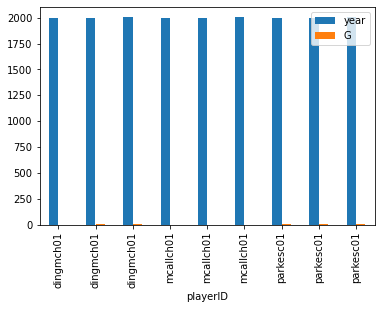

In [30]:
basic_df3.set_index('playerID').plot.bar()


<AxesSubplot:xlabel='playerID'>

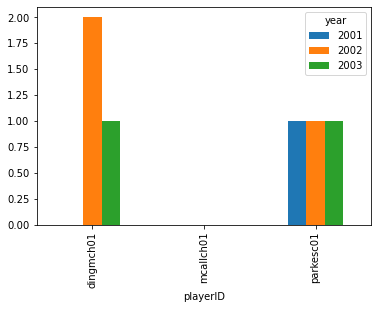

In [31]:
pivot.plot.bar()


As clearly visible in above graphs, sometimes it is important to change the data format to get most value out of data.
Although we can change the matplotlib config to get the required result in the plots, but it is more convenient to
change the data format to get the most value out of the data, and it increases productivity.


In [36]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,dingmch01,0.0,2.0,1.0
1,mcallch01,0.0,0.0,0.0
2,parkesc01,1.0,1.0,1.0


In [37]:
pivot.melt()

,variable,value
0,playerID,dingmch01
1,playerID,mcallch01
2,playerID,parkesc01
3,2001,0.0
4,2001,0.0
5,2001,1.0
6,2002,2.0
7,2002,0.0
8,2002,1.0
9,2003,1.0


In [39]:
pivot.melt(id_vars="playerID")


,playerID,variable,value
0,dingmch01,2001,0.0
1,mcallch01,2001,0.0
2,parkesc01,2001,1.0
3,dingmch01,2002,2.0
4,mcallch01,2002,0.0
5,parkesc01,2002,1.0
6,dingmch01,2003,1.0
7,mcallch01,2003,0.0
8,parkesc01,2003,1.0


In [40]:
pivot.melt(id_vars="playerID", var_name='year', value_name='goals')


,playerID,year,goals
0,dingmch01,2001,0.0
1,mcallch01,2001,0.0
2,parkesc01,2001,1.0
3,dingmch01,2002,2.0
4,mcallch01,2002,0.0
5,parkesc01,2002,1.0
6,dingmch01,2003,1.0
7,mcallch01,2003,0.0
8,parkesc01,2003,1.0


In [41]:
pivot.melt(id_vars='playerID', var_name='year', value_name='goals', value_vars=[2001, 2002])


,playerID,year,goals
0,dingmch01,2001,0.0
1,mcallch01,2001,0.0
2,parkesc01,2001,1.0
3,dingmch01,2002,2.0
4,mcallch01,2002,0.0
5,parkesc01,2002,1.0


In [42]:
larger_df3 = df3[['playerID', 'tmID', 'year', 'G']]
larger_df3


,playerID,tmID,year,G
5814,dingmch01,CAR,2001,0.0
5816,dingmch01,TBL,2002,2.0
5817,dingmch01,TBL,2003,1.0
16254,mcallch01,PHI,2001,0.0
16255,mcallch01,PHI,2002,0.0
16257,mcallch01,COL,2003,0.0
19566,parkesc01,COL,2001,1.0
19567,parkesc01,COL,2002,1.0
19568,parkesc01,SJS,2003,1.0


In [45]:
try:
    result = larger_df3.pivot(index=['playerID', 'tmID'], columns='year', values='G')
    print(result)
except Exception as e:
    print(e)


year            2001  2002  2003
playerID  tmID                  
dingmch01 CAR    0.0   NaN   NaN
          TBL    NaN   2.0   1.0
mcallch01 PHI    0.0   0.0   NaN
          COL    NaN   NaN   0.0
parkesc01 COL    1.0   1.0   NaN
          SJS    NaN   NaN   1.0


In [47]:
larger_pivot = larger_df3.pivot(index=['playerID', 'tmID'], columns='year', values='G')
larger_pivot

year            2001  2002  2003
playerID  tmID                  
dingmch01 CAR    0.0   NaN   NaN
          TBL    NaN   2.0   1.0
mcallch01 PHI    0.0   0.0   NaN
          COL    NaN   NaN   0.0
parkesc01 COL    1.0   1.0   NaN
          SJS    NaN   NaN   1.0

In [48]:
larger_pivot.index


MultiIndex([('dingmch01', 'CAR'),
            ('dingmch01', 'TBL'),
            ('mcallch01', 'PHI'),
            ('mcallch01', 'COL'),
            ('parkesc01', 'COL'),
            ('parkesc01', 'SJS')],
           names=['playerID', 'tmID'])

In [49]:
larger_df3 = df3[['playerID', 'year', 'G', 'A']]
larger_df3


,playerID,year,G,A
5814,dingmch01,2001,0.0,1.0
5816,dingmch01,2002,2.0,1.0
5817,dingmch01,2003,1.0,5.0
16254,mcallch01,2001,0.0,5.0
16255,mcallch01,2002,0.0,0.0
16257,mcallch01,2003,0.0,0.0
19566,parkesc01,2001,1.0,4.0
19567,parkesc01,2002,1.0,3.0
19568,parkesc01,2003,1.0,3.0


In [50]:
larger_pivot = larger_df3.pivot(index="playerID", columns='year', values=['G', 'A'])
larger_pivot


G              A          
year      2001 2002 2003 2001 2002 2003
playerID                               
dingmch01  0.0  2.0  1.0  1.0  1.0  5.0
mcallch01  0.0  0.0  0.0  5.0  0.0  0.0
parkesc01  1.0  1.0  1.0  4.0  3.0  3.0

In [51]:
larger_pivot.index


Index(['dingmch01', 'mcallch01', 'parkesc01'], dtype='object', name='playerID')

In [52]:
larger_pivot.columns


MultiIndex([('G', 2001),
            ('G', 2002),
            ('G', 2003),
            ('A', 2001),
            ('A', 2002),
            ('A', 2003)],
           names=[None, 'year'])